<a href="https://colab.research.google.com/github/qwertyqwertyqwertyqwerty123/colab_projects/blob/main/log_regreession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split # Функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # Наша модель для классификации
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive # Импорт файла
drive.mount('/content/drive')

# DIR PATH to DATA
dir_path = "/content/drive/My Drive/"

Mounted at /content/drive


In [ ]:
csv_file_path_1 = dir_path + 'smoking.csv'
csv_file_path_1

'/content/drive/My Drive/smoking.csv'

In [ ]:
# Чтение данных из файла smoking.csv
data = pd.read_csv(csv_file_path_1)
print(data.shape)
data.head()

(55692, 27)


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
data.info() # Проверим данные и тип данных в столбцах (есть 3 нечисловых признака)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [ ]:
data_1 = data.drop(['gender', 'oral', 'tartar', 'ID'], axis =1) # Удаляем нечисловые данные

In [ ]:
Y = data_1['smoking'] # Целевая переменная (курение): 0 - нет, 1 - да
X = data_1.drop(['smoking'],axis =1)# X - признаки, по которым мы будем предсказывать факт наличия вредной привычки
X

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,gender_1,oral_1,tartar_1
0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,1
1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1,1
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0,1,1,0
3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0,1,1,1
4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,...,12.3,1.0,0.6,14.0,7.0,10.0,1,0,1,1
55688,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,...,14.0,1.0,0.9,20.0,12.0,14.0,0,0,1,1
55689,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,...,12.4,1.0,0.5,17.0,11.0,12.0,0,0,1,0
55690,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,...,14.4,1.0,0.7,20.0,19.0,18.0,0,1,1,0


In [ ]:
#Делим на тренировочную и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [ ]:
#Модель - логистическая регрессия
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Вывод описательных статистик полученной модели
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_test)
print('accuracy ', accuracy_score(Y_test,Y_predicted))
print('precision ', precision_score(Y_test,Y_predicted))
print('recall ', recall_score(Y_test,Y_predicted))
print('f1 ', f1_score(Y_test,Y_predicted))

accuracy  0.7140292075652382
precision  0.6328109885858
recall  0.5317834498455536
f1  0.5779151943462898


Итоги регрессии, полученные на 1 этапе (после удаления нечисловых переменных)

accuracy  0.7097797462293512

precision  0.6347268211920529

recall  0.4986181108762803

f1  0.5584994992260767

На 2 этапе (после добавления gender_1)

accuracy  0.7091812305482403

precision  0.6334159438248658

recall  0.4986181108762803

f1  0.5579914491039752

На 3 этапе (после преобразования всех нечисловых переменных):

accuracy  0.7140292075652382

precision  0.6328109885858

recall  0.5317834498455536

f1  0.5779151943462898

In [ ]:
import sklearn.metrics
r = sklearn.metrics.confusion_matrix(Y_test,Y_predicted)
print(r)

[[8659 1898]
 [2880 3271]]


8792 – это True Negatives (TN): Количество правильно предсказанных случаев, когда человек не курит (0) и модель тоже предсказала 0.

1765 – это False Positives (FP): Количество людей, которые не курят (0), но модель ошибочно предсказала, что они курят (1).

3084 – это False Negatives (FN): Количество людей, которые курят (1), но модель ошибочно предсказала, что они не курят (0).

3067 – это True Positives (TP): Количество правильно предсказанных случаев, когда человек курит (1) и модель тоже предсказала 1.

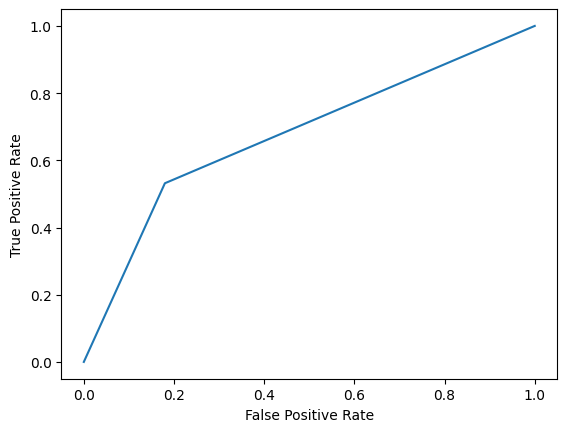

In [ ]:
import matplotlib.pyplot as plt
fpr, tpr, _ = sklearn.metrics. roc_curve (Y_test, Y_predicted)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

По моему мнению, последовательность переменных по степени влияния на результативный признак (от большего к меньшему) такова: 'gender', 'tartar, 'oral'.

In [ ]:
data['gender'].value_counts()

,count
gender,
M,35401
F,20291


In [ ]:
data['tartar'].value_counts()

,count
tartar,
Y,30940
N,24752


In [ ]:
data['oral'].value_counts()

,count
oral,
Y,55692


In [ ]:
#Преобразование переменной gender
data['gender_1'] = data['gender'].apply(lambda x: 0 if x == 'F' else 1)
data['oral_1'] = data['oral'].replace(['Y', 'N'],[0, 1])
intent_map = {'Y':1, 'N':2,}
data['tartar_1'] = data['tartar'].map(intent_map)

<ipython-input-53-511a2438989c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['oral_1'] = data['oral'].replace(['Y', 'N'],[0, 1])


**ВЫВОД:**

После преобразования нечисловых переменных метрики немного улучшились. Accuracy выросла до 71.4%, recall до 53.2%, а F1-score до 57.8%. Модель стала лучше находить курильщиков, но precision почти не изменился. В целом, результат стал чуть лучше, но есть смысл дальше улучшать recall, если важно выявлять больше курильщиков.